In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# TED Site Data

In [2]:
path = '../src/data/'
data_file = 'ted_main.csv'

In [3]:
data = pd.read_csv(path + data_file)
num_talks = data.shape[0]

In [4]:
positive_tags = ['Funny', 'Beautiful', 'Ingenious',
                 'Courageous', 'Informative', 'Fascinating',
                 'Persuasive', 'Jaw-dropping', 'Inspiring']
negative_tags = ['Longwinded', 'Confusing', 'Unconvincing',
                 'OK', 'Obnoxious']

In [5]:
ted_views = []
ted_comments = []
pos_neg_ratio = []
comment_view_ratio = []

#for computing aggregate metrics
ted_positive = []
ted_negative = []

for index, row in data.iterrows():
    
    if index % 100 == 0:
        print(f'Processing transcript {index} of {num_talks}')
        
    ### Compute Positive to Negative Reaction Ratio ###
        
    pos_count = 0
    neg_count = 0
    
    ratings = json.loads(row['ratings'].replace("'", '"'))
    for tag in ratings:
        if tag['name'] in positive_tags:
            pos_count += tag['count']
        elif tag['name'] in negative_tags:
            neg_count += tag['count']
            
    try:
        pos_neg_ratio.append(pos_count/neg_count)
    except:
        print('\nTalk with all positive reactions:\n')
        print(row['name'])
        print(pos_count)
        print(neg_count)
        pos_neg_ratio.append(pos_count/1)
        
    ted_positive.append(pos_count)
    ted_negative.append(neg_count)
    
    ### Compute Comment to View Ratio ###
    
    comment_view_ratio.append(row['comments']/row['views'])
    
    ted_views.append(row['views'])
    ted_comments.append(row['comments'])
            

Processing transcript 0 of 2550
Processing transcript 100 of 2550
Processing transcript 200 of 2550
Processing transcript 300 of 2550
Processing transcript 400 of 2550
Processing transcript 500 of 2550
Processing transcript 600 of 2550
Processing transcript 700 of 2550
Processing transcript 800 of 2550
Processing transcript 900 of 2550
Processing transcript 1000 of 2550
Processing transcript 1100 of 2550
Processing transcript 1200 of 2550
Processing transcript 1300 of 2550
Processing transcript 1400 of 2550
Processing transcript 1500 of 2550
Processing transcript 1600 of 2550
Processing transcript 1700 of 2550
Processing transcript 1800 of 2550
Processing transcript 1900 of 2550
Processing transcript 2000 of 2550
Processing transcript 2100 of 2550
Processing transcript 2200 of 2550
Processing transcript 2300 of 2550
Processing transcript 2400 of 2550

Talk with all positive reactions:

Manu Prakash: Lifesaving scientific tools made of paper
499
0

Talk with all positive reactions:

Jor

In [6]:
# validate lengths
print(data.shape[0])
print(len(pos_neg_ratio))
print(len(comment_view_ratio))

2550
2550
2550


In [7]:
# normalize metrics
# pn_norm = [i/max(pos_neg_ratio) for i in pos_neg_ratio]
# cv_norm = [i/max(comment_view_ratio) for i in comment_view_ratio]

In [8]:
# rounding
pos_neg_ratio = [round(i, 5) for i in pos_neg_ratio]
comment_view_ratio = [round(i, 5) for i in comment_view_ratio]

In [9]:
print(comment_view_ratio[0:5])

[0.0001, 8e-05, 8e-05, 0.00012, 5e-05]


# Youtube Data

In [10]:
path = '../../data/'
data_file = 'ted_merged_site_yt.csv'

In [11]:
yt_data = pd.read_csv(path + data_file)
yt_num_talks = yt_data.shape[0]

In [12]:
yt_views = []
yt_comments = []
yt_like_dislike_ratio = []
yt_comment_view_ratio = []

yt_like = []
yt_dislike = []

for index, row in yt_data.iterrows():
    
    if index % 100 == 0:
        print(f'Processing transcript {index} of {yt_num_talks}')
    
    # append to popularity metric lists
    yt_views.append(row['youtube_viewCount'])
    yt_comments.append(row['youtube_commentCount'])
    try:
        yt_like_dislike_ratio.append(row['youtube_likeCount']/row['youtube_dislikeCount'])
    except:
        print('\nTalk with all positive reactions:')
        print('\t'+row['name'])
        print('\t'+str(row['youtube_likeCount']))
        print('\t'+str(row['youtube_dislikeCount']))
        yt_like_dislike_ratio.append(row['youtube_likeCount']/1)
    yt_comment_view_ratio.append(row['youtube_commentCount']/row['youtube_viewCount'])
    
    yt_like.append(row['youtube_likeCount'])
    yt_dislike.append(row['youtube_dislikeCount'])

Processing transcript 0 of 2550

Talk with all positive reactions:
	Neil Gershenfeld: Unleash your creativity in a Fab Lab
	18.0
	0.0

Talk with all positive reactions:
	Dean Kamen: To invent is to give
	1.0
	0.0

Talk with all positive reactions:
	Golan Levin: Software (as) art
	5.0
	0.0

Talk with all positive reactions:
	Jill Sobule: Global warming's theme song, "Manhattan in January"
	0.0
	0.0

Talk with all positive reactions:
	Rives: A mockingbird remix of TED2006
	69.0
	0.0
Processing transcript 100 of 2550

Talk with all positive reactions:
	Natalie MacMaster: Cape Breton fiddling in reel time
	5.0
	0.0

Talk with all positive reactions:
	Stew: "Black Men Ski"
	9.0
	0.0

Talk with all positive reactions:
	Stewart Brand: What squatter cities can teach us
	4.0
	0.0

Talk with all positive reactions:
	Ethel: A string quartet plays "Blue Room"
	4.0
	0.0

Talk with all positive reactions:
	Bill Stone: I'm going to the moon. Who's with me?
	7.0
	0.0

Talk with all positive reactions:

In [13]:
# validate lengths
print(yt_data.shape[0])
print(len(yt_views))
print(len(yt_comments))
print(len(yt_like_dislike_ratio))
print(len(yt_comment_view_ratio))

2550
2550
2550
2550
2550


# Compute Aggregate Metrics and Save Results

In [15]:
agg_pos = [sum(x) for x in zip(ted_positive, yt_like)]
agg_neg = [sum(x) for x in zip(ted_negative, yt_dislike)]

agg_views = [sum(x) for x in zip(ted_views, yt_views)]
agg_comments = [sum(x) for x in zip(ted_comments, yt_comments)]
agg_comment_view_ratio = [x/y for x,y in zip(agg_comments, agg_views)]
agg_pos_neg_ratio = [x/y for x,y in zip(agg_pos, agg_neg)]

In [16]:
# Remove columns and add popularity metrics
data = data.drop(columns=['comments','description','duration','event','film_date',
                         'languages','main_speaker','num_speaker','published_date',
                         'ratings','related_talks','speaker_occupation','tags',
                         'title','url','views'])

In [17]:
# add the metrics to the dataframe
data['ted_views'] = ted_views
data['ted_comments'] = ted_comments
data['ted_engagement'] = comment_view_ratio
data['ted_positivity'] = pos_neg_ratio

data['yt_views'] = yt_views
data['yt_comments'] = yt_comments
data['yt_engagement'] = yt_comment_view_ratio
data['yt_positivity'] = yt_like_dislike_ratio 

data['agg_views'] = agg_views
data['agg_comments'] = agg_comments
data['agg_engagement'] = agg_comment_view_ratio
data['agg_positivity'] = agg_pos_neg_ratio

In [18]:
data.head()

,name,ted_views,ted_comments,ted_engagement,ted_positivity,yt_views,yt_comments,yt_engagement,yt_positivity,agg_views,agg_comments,agg_engagement,agg_positivity
0,Ken Robinson: Do schools kill creativity?,47227110,4553,0.00010,39.59256,17861752.0,10150.0,0.000568,59.014744,65088862.0,14703.0,0.000226,50.748159
1,Al Gore: Averting the climate crisis,3200520,265,0.00008,2.82790,187369.0,300.0,0.001601,3.187500,3387889.0,565.0,0.000167,2.913605
2,David Pogue: Simplicity sells,1636292,124,0.00008,4.68209,91385.0,52.0,0.000569,12.288462,1727677.0,176.0,0.000102,5.402550
3,Majora Carter: Greening the ghetto,1697550,200,0.00012,14.46888,151953.0,81.0,0.000533,27.434783,1849503.0,281.0,0.000152,16.547038
4,Hans Rosling: The best stats you've ever seen,12005869,593,0.00005,44.91398,3044685.0,979.0,0.000322,42.996324,15050554.0,1572.0,0.000104,43.967332


In [19]:
data.to_csv('all_popularity_metrics.csv')

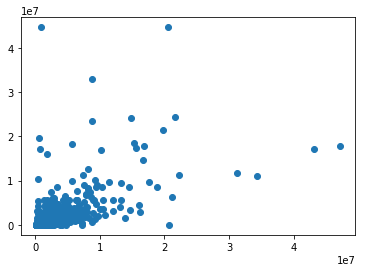

In [21]:
plt.scatter(data['ted_views'], data['yt_views'])

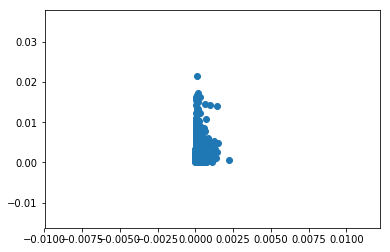

In [22]:
plt.scatter(data['ted_engagement'], data['yt_engagement'])

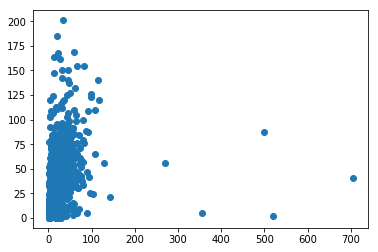

In [23]:
plt.scatter(data['ted_positivity'], data['yt_positivity'])